<h2 style="font-family:Times New Roman;">Loading required libraries</h2>

In [2]:
import json
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
%cd C:/Users/Suhas/Documents/MSBA/Semester Two/Predictive Analytics/Project/Data/Data

C:\Users\Suhas\Documents\MSBA\Semester Two\Predictive Analytics\Project\Data\Data


<h2 style="font-family:Times New Roman;">Reading the datasets</h2>

In [2]:
# Checkin data
with open('checkin.json') as f:
    checkin = pd.DataFrame(json.loads(line) for line in f)

# Business data
with open('business.json') as f:
    business = pd.DataFrame(json.loads(line) for line in f)

# Tip data 
with open('tip.json') as f:
    tip = pd.DataFrame(json.loads(line) for line in f)

# User data
with open('user.json') as f:
    user = pd.DataFrame(json.loads(line) for line in f)

# Review data
with open('review.json') as f:
    review = pd.DataFrame(json.loads(line) for line in f)

In [22]:
checkin.to_csv("checkin.csv", index = False, encoding='utf-8')

In [23]:
review.to_csv("review.csv", index=False, encoding='utf-8')

In [24]:
business.to_csv("business.csv", index=False, encoding='utf-8')

In [25]:
user.to_csv("user.csv", index=False, encoding='utf-8')

In [26]:
tip.to_csv("tip.csv", index=False, encoding='utf-8')

<h2 style="font-family:Times New Roman;">Visualizing the dataset</h2>

In [3]:
# Review data
review.head(n=2)

,business_id,date,review_id,stars,text,type,user_id,votes
0,5UmKMjUEUNdYWqANhGckJw,2012-08-01,Ya85v4eqdd6k9Od8HbQjyA,4,"Mr Hoagie is an institution. Walking in, it do...",review,PUFPaY9KxDAcGqfsorJp3Q,"{u'funny': 0, u'useful': 0, u'cool': 0}"
1,5UmKMjUEUNdYWqANhGckJw,2014-02-13,KPvLNJ21_4wbYNctrOwWdQ,5,Excellent food. Superb customer service. I mis...,review,Iu6AxdBYGR4A0wspR9BYHA,"{u'funny': 0, u'useful': 0, u'cool': 0}"


In [4]:
# Business data
business.head(n=2)

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,"{u'Take-out': True, u'Drive-Thru': False, u'Ou...",5UmKMjUEUNdYWqANhGckJw,"[Fast Food, Restaurants]",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{u'Tuesday': {u'close': u'21:00', u'open': u'1...",40.354327,-79.900706,Mr Hoagie,[],True,7,3.5,PA,business
1,"{u'Happy Hour': True, u'Accepts Credit Cards':...",UsFtqoBl7naz8AVUBZMjQQ,[Nightlife],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350553,-79.886814,Clancy's Pub,[],True,5,3.0,PA,business


In [5]:
# Checkin Data
checkin.head(n=5)

,business_id,checkin_info,type
0,cE27W9VPgO88Qxe4ol6y_g,"{u'9-5': 1, u'7-5': 1, u'13-3': 1, u'17-6': 1,...",checkin
1,mVHrayjG3uZ_RLHkLj-AMg,"{u'11-5': 1, u'9-5': 2, u'9-4': 3, u'15-1': 1,...",checkin
2,mYSpR_SLPgUVymYOvTQd_Q,"{u'5-5': 1, u'5-4': 1, u'9-3': 1, u'11-4': 1, ...",checkin
3,KayYbHCt-RkbGcPdGOThNg,"{u'23-1': 1, u'11-2': 2, u'21-4': 1, u'16-1': ...",checkin
4,b12U9TFESStdy7CsTtcOeg,"{u'5-5': 2, u'13-2': 1, u'8-6': 1, u'5-1': 2, ...",checkin


In [6]:
# User data
user.head(n=2)

,average_stars,compliments,elite,fans,friends,name,review_count,type,user_id,votes,yelping_since
0,4.14,"{u'profile': 8, u'cute': 15, u'funny': 11, u'p...","[2005, 2006]",69,"[rpOyqD_893cqmDAtJLbdog, 4U9kSBLuBDU391x6bxU-Y...",Russel,108,user,18kPq7GPye-YQ3LyKyAZPw,"{u'funny': 167, u'useful': 282, u'cool': 246}",2004-10
1,3.67,"{u'profile': 117, u'cute': 204, u'funny': 594,...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",1345,"[18kPq7GPye-YQ3LyKyAZPw, 4U9kSBLuBDU391x6bxU-Y...",Jeremy,1292,user,rpOyqD_893cqmDAtJLbdog,"{u'funny': 8399, u'useful': 15242, u'cool': 12...",2004-10


In [7]:
# Tip data
tip.head(n=5)

,business_id,date,likes,text,type,user_id
0,5UmKMjUEUNdYWqANhGckJw,2016-07-17,0,Pizza is garbage. Hoagies are excellent.,tip,ZxdojCZgZhw36xuSGaryRg
1,cE27W9VPgO88Qxe4ol6y_g,2013-04-18,0,Don't waste your time.,tip,-6rEfobYjMxpUWLNxszaxQ
2,mVHrayjG3uZ_RLHkLj-AMg,2016-02-22,0,Not easy to find. Be sure to put in directions...,tip,5OumCBQ_MyQsltSdbMyunA
3,mVHrayjG3uZ_RLHkLj-AMg,2013-01-06,1,Your GPS will not allow you to find this place...,tip,EZ0r9dKKtEGVx2CdnowPCw
4,KayYbHCt-RkbGcPdGOThNg,2013-12-03,0,Great drink specials!,tip,xb6zEQCw9I-Gl0g06e1KsQ


<h2 style="font-family:Times New Roman;">Performing Exploratory Data Analysis</h2>

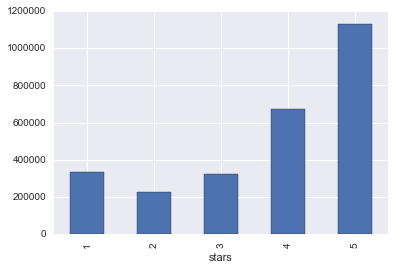

In [17]:
# Distributiong of stars
review.groupby('stars').size().plot(kind = 'bar')

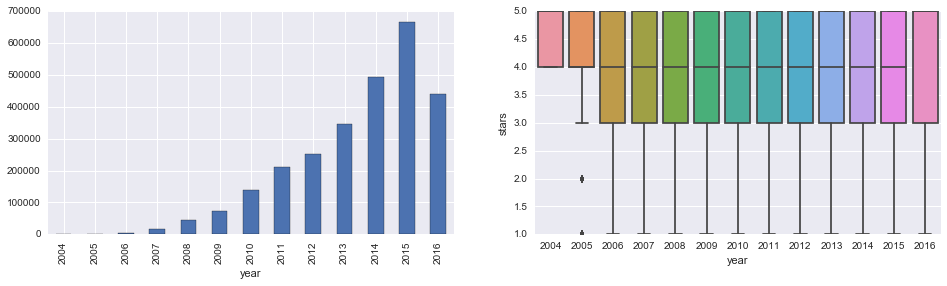

In [18]:
# Number of reviews and ratings per year
review['date'] = pd.to_datetime(review['date'])
review['year'] = [d.year for d in review['date']]

fig, axs = plt.subplots(1, 2)
review.groupby('year').size().plot(kind = 'bar', ax = axs[0], figsize = (16, 4))
sns.boxplot(review['year'], review['stars'], ax = axs[1])

In [28]:
print 'the number of unique business_ids from the reviews dataset:', len(set(review['business_id']))
print 'the number of unique business_ids from the business dataset:', len(business)

the number of unique business_ids from the reviews dataset: 85539
the number of unique business_ids from the business dataset: 85901


In [27]:
print 'The number of business_ids the two datasets have in common:', len(set(review['business_id']) & set(business['business_id']))

the number of business_ids the two datasets have in common: 85539


In [29]:
category_len = [len(c) for c in business['categories']]
print 'the number of blank business categories:', sum(np.array(category_len) == 0)

the number of blank business categories: 241


In [30]:
for cat in business['categories'][np.array(category_len) == 0]:
    cat.append('NA')

In [31]:
# count the frequencies of all categories
categories_all = sum(business['categories'], [])
categories_all_count = pd.value_counts(categories_all)

# for each business listing, find the category description that is most common to all
categories = business['categories']
categories_count = [[categories_all_count[c] for c in category] for category in categories]

most_common_ix = [np.argmax(counts) for counts in categories_count]
most_common_categories = [categories[i][most_common_ix[i]] for i in xrange(len(categories))]

# count again
pd.value_counts(most_common_categories)

Restaurants                     26729
Shopping                        12406
Food                             6978
Beauty & Spas                    6676
Home Services                    5475
Health & Medical                 5239
Automotive                       4456
Local Services                   3051
Active Life                      2976
Nightlife                        2529
Event Planning & Services        2472
Pets                             1600
Arts & Entertainment             1200
Hotels & Travel                  1026
Financial Services                952
Professional Services             527
Education                         489
Public Services & Government      425
NA                                241
Religious Organizations           226
Local Flavor                      133
Mass Media                         95
dtype: int64

In [32]:
# better, but there's still categories that can be grouped together (based on subjective reviews)
category_map = {'Food': 'Restaurants', 'Local Flavor': 'Arts & Entertainment', 'Mass Media': 'Arts & Entertainment'}
most_common_categories = [category_map[category] if category in category_map else category
                          for category in most_common_categories]
business['category'] = most_common_categories

In [33]:
business['price'] = [attr['Price Range'] if 'Price Range' in attr else np.nan for attr in business['attributes']]

In [36]:
business['state'] = [state if state in ['AZ', 'NV', 'WI', 'PA', 'NC'] else 'Others'
                     for state in business['state']]

In [37]:
# select fields to save
business = business[['business_id', 'category', 'price', 'state']]
business.to_pickle('business.pkl')

In [38]:
reviews = pd.merge(review, business, how = 'left', on = 'business_id')

In [40]:
reviews.shape

(2685066, 12)

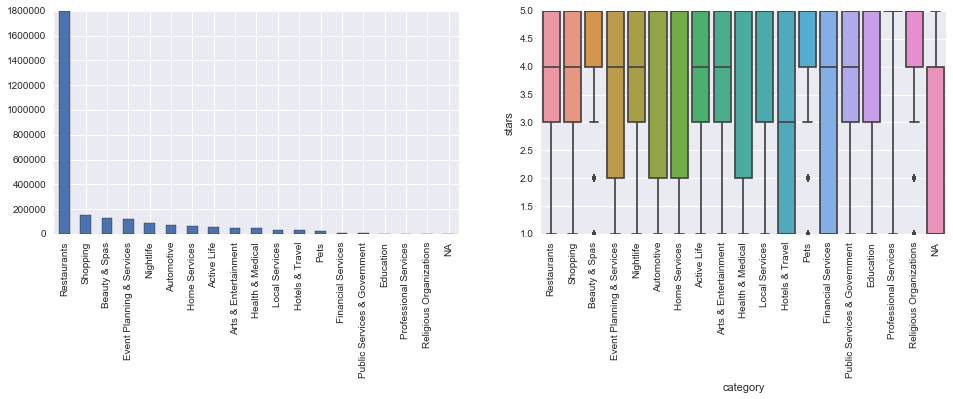

In [42]:
# analyze the number of reviews and ratings per category
fig, axs = plt.subplots(1, 2)
pd.value_counts(reviews['category']).plot(kind = 'bar', ax = axs[0], figsize = (16, 4))
sns.boxplot(reviews['category'],reviews['stars'],order = pd.value_counts(reviews['category']).index, ax = axs[1])

# rotate labels for the boxplot
for tick in axs[1].xaxis.get_major_ticks():
    tick.label.set_rotation('vertical')

In [45]:
pd.to_pickle(reviews, 'reviews.pkl')

In [3]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
import cPickle as pickle
from __future__ import division
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# split into training and test set with equal proportions for each category and rating (i.e., stratified sampling)
def group_sample(group):
    ix = list(group.index)
    np.random.seed(2014)
    np.random.shuffle(ix)
    
    train_ix, test_ix = ix[:int(.7 * len(ix))], ix[int(.7 * len(ix)):]
    return (train_ix, test_ix)

ixs = reviews.groupby(['category', 'stars']).apply(group_sample)
train_ix, test_ix = sum([ix[0] for ix in ixs], []), sum([ix[1] for ix in ixs], [])

reviews_train = reviews.ix[train_ix]
reviews_test = reviews.ix[test_ix]

In [ ]:
reviews_train.to_pickle('reviews_train.pkl')
reviews_test.to_pickle('reviews_test.pkl')

In [4]:
reviews_train = pd.read_pickle('reviews_train.pkl')

In [5]:
# Making the dataset only for restaurants
reviews_train = reviews_train[reviews_train['category'] == 'Restaurants']

In [6]:
# Making the dataset only for Nevada state
reviews_train = reviews_train[reviews_train['state'] == 'NV']

In [7]:
# clean reviews by keeping only alphabetic characters and exclamation marks
text_cleaned = [re.sub(r'!', ' exclamation', text) for text in reviews_train['text']]
text_cleaned = [text.lower() for text in text_cleaned]
text_cleaned = [re.sub(r'[^a-z]', ' ', text) for text in text_cleaned]
reviews_train['text_cleaned'] = text_cleaned

In [8]:
# create document-term matrix using the cleaned reviews
vectorizer = CountVectorizer(min_df = 100)
dtm = vectorizer.fit_transform(reviews_train['text_cleaned'])
dtm.shape

(505807, 10290)

In [9]:
# calculate the total frequency across all documents for each word (i.e., the column sums)
freq = csr_matrix.sum(dtm, 0)

# devide the individual frequency by the total frequency to calculate the percentage of time a word "spends" on each document
freq_inverse = np.repeat(1, freq.shape[1]) / freq
freq_inverse = csr_matrix(freq_inverse)
dtm_prc = dtm.multiply(freq_inverse)

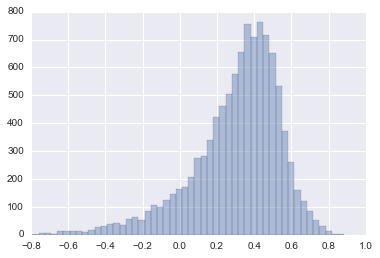

In [10]:
# calculate the sentiment score for each word by weighting its percentage frequency by the number of stars
# first normalize the star ratings to [-1, 1]:
def normalization(series):
    return (2 * series - (series.max() + series.min())) / (series.max() - series.min())
stars_norm = normalization(reviews_train['stars'])

# calculate word scores using the normlized star ratings
word_score = dtm_prc.T * stars_norm
sns.distplot(word_score, kde = False)

In [11]:
# combine with the terms
word2score = dict(zip(vectorizer.get_feature_names(), word_score))

In [12]:
# check out the most favorable words
sorted(word2score.items(), key = lambda x: -x[1])[:30]

[(u'paco', 0.88356164383561364),
 (u'olivier', 0.85875706214689107),
 (u'gangnam', 0.82781456953642618),
 (u'gem', 0.82569974554706349),
 (u'yummmmm', 0.81528662420382159),
 (u'haves', 0.81502890173410669),
 (u'biaggio', 0.80808080808080762),
 (u'hokkaido', 0.80040322580645096),
 (u'unparalleled', 0.79545454545454386),
 (u'mahalo', 0.79320987654321207),
 (u'donna', 0.79132231404958508),
 (u'royalty', 0.78846153846154066),
 (u'okinawa', 0.78521126760563309),
 (u'symphony', 0.7850467289719627),
 (u'devine', 0.78497409326425038),
 (u'jewel', 0.78451178451178272),
 (u'goooood', 0.78358208955224018),
 (u'passionate', 0.7830396475770961),
 (u'reina', 0.78169014084506971),
 (u'exceeded', 0.78043478260870525),
 (u'incredible', 0.77967958373264379),
 (u'remembers', 0.77948113207547765),
 (u'unmatched', 0.77499999999999969),
 (u'impeccable', 0.7747339377216913),
 (u'delicioso', 0.77428571428571324),
 (u'bronze', 0.77393617021276617),
 (u'mazing', 0.77346938775510454),
 (u'savored', 0.77289377289

In [13]:
# check out the most negative words
sorted(word2score.items(), key = lambda x: x[1])[:30]

[(u'refund', -0.79343220338983445),
 (u'disgrace', -0.76515151515151458),
 (u'roaches', -0.74842767295597479),
 (u'poisoning', -0.74748257164987475),
 (u'disrespect', -0.74000000000000055),
 (u'aweful', -0.73873873873873863),
 (u'cockroach', -0.73674911660777542),
 (u'rudest', -0.73655913978494569),
 (u'audacity', -0.73550724637681197),
 (u'incompetent', -0.72187500000000149),
 (u'rudely', -0.70885200553250127),
 (u'confronted', -0.70703125),
 (u'diarrhea', -0.70464135021096885),
 (u'worst', -0.704030758830551),
 (u'disrespectful', -0.70234113712374546),
 (u'unprofessional', -0.69642857142857062),
 (u'disgusted', -0.68692449355432983),
 (u'scam', -0.68548387096774277),
 (u'vomiting', -0.6821192052980134),
 (u'disgusting', -0.68162453848336835),
 (u'roach', -0.65916955017301138),
 (u'replies', -0.65454545454545388),
 (u'compensation', -0.65340909090909083),
 (u'injury', -0.6528497409326437),
 (u'accused', -0.64864864864864868),
 (u'blamed', -0.64778325123152858),
 (u'horrible', -0.64694

In [43]:
with open('word2score.pkl', 'wb') as output:
    pickle.dump(word2score, output)

In [14]:
# calculate sentiment scores for each reviews
review_score = dtm * np.atleast_2d(word_score).T

# divide the scores by the total number of words in each document
dtm_row_sum = csr_matrix.sum(dtm, 1)
review_score = review_score / dtm_row_sum

In [15]:
# for reviews that don't include any words in the dtm, replace the 0 scores with NAs
review_score[dtm_row_sum == 0] = np.nan
print 'the number of reviews with NA scores:', sum(pd.isnull(review_score))[0, 0]

the number of reviews with NA scores: 94


In [16]:
# combine scores with the reviews
reviews_train['score'] = review_score

# visualize distribution of the scores
#fig, axs = plt.subplots(1, 2)
#reviews_train['score'].hist(bins = 60, ax = axs[0], figsize = (16, 4))
#sns.boxplot(reviews_train['score'], reviews_train['stars'])

In [17]:
print 'the most favorite reviews by star:'
print reviews_train.groupby('stars').apply(lambda x: x.sort('score', ascending = False)['text'][:5])
print
print 'the least favorite reviews by star:'
print reviews_train.groupby('stars').apply(lambda x: x.sort('score')['text'][:5])

the most favorite reviews by star:


C:\Users\Suhas\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


stars         
1      1704205                                                Yummy
       678333                                             Unlike !!
       269239                                   Closed!!!!!!!!  :-/
       229395                                                   chi
       1604079                                   I love the bignets
2      1825282               I love this place is so delicious!!!!!
       595209                     Enjoyed the view at Bon Ami Gabi.
       980115     Once again delish!  The breakfast burrito with...
       1309081    Auf der Suche nach einem guten Burger am Strip...
       593032     Wir haben die durchweg positiven Bewertungen f...
3      2002722                                                  Yum
       879128                                              Friendly
       2558127                                               Yummy!
       1636869                               Awesome Spam Musabi!!!
       228451                    

C:\Users\Suhas\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


stars         
1      1938976                                             horrible
       933171                                             terrible.
       1562143                                               Gross.
       529240                                                  puke
       476184                                                 Sucks
2      667248                                             Pathetic.
       1377966                                                dirty
       705712                                                 Bland
       1691531                                        rude serviced
       2673228                           Overpriced. Disappointing.
3      1060343                                           Overrated.
       2390736                                        Sorry mistake
       1067168                                                 Meh.
       1380429    朝7時の開店直後にソーセージ・エッグ・サンドイッチを注文。同時に頼むとコーヒーは$1だったの...
       804291                    

In [18]:
# check out the most favorable reviews
reviews_train_excl_na = reviews_train.dropna(subset = ['score']).sort(columns = 'score', ascending = False)
for i in xrange(10):
    print 'business id:', reviews_train_excl_na.iloc[i]['business_id']
    print 'stars: %d\nscores: %f' % (reviews_train_excl_na.iloc[i]['stars'], reviews_train_excl_na.iloc[i]['score'])
    print 'reviews:', reviews_train_excl_na.iloc[i]['text'], '\n'
    print '***************************************************************************************************\n'

C:\Users\Suhas\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


business id: vFZAKJv9u0NsEEnQhikyEA
stars: 5
scores: 0.774286
reviews: Simplemente  DELICIOSO =0 

***************************************************************************************************

business id: ZZtEx_UutNxz9B5knTL4tQ
stars: 5
scores: 0.754092
reviews: Hidden gem. 

***************************************************************************************************

business id: 3uUYfeMGAywRy1aN01n-Sg
stars: 5
scores: 0.750651
reviews: Amazing 

***************************************************************************************************

business id: 9Bnc9YP0n5cR57xkP6fQmQ
stars: 5
scores: 0.750651
reviews: amazing 

***************************************************************************************************

business id: tFU2Js_nbIZOrnKfYJYBBg
stars: 5
scores: 0.750651
reviews: Amazing 

***************************************************************************************************

business id: aGbjLWzcrnEx2ZmMCFm3EA
stars: 5
scores: 0.750651
review

In [19]:
# and the least favorable ones
base_ind = len(reviews_train_excl_na) - 1
for i in xrange(10):
    print 'business id:', reviews_train_excl_na.iloc[base_ind - i]['business_id']
    print 'stars: %d\nscores: %f' % (reviews_train_excl_na.iloc[base_ind - i]['stars'], 
                                               reviews_train_excl_na.iloc[base_ind - i]['score'])
    print 'reviews:', reviews_train_excl_na.iloc[base_ind - i]['text'], '\n'
    print '***************************************************************************************************\n'

business id: nREHMbIzWdfWtOh4l1bT3g
stars: 1
scores: -0.646947
reviews: horrible 

***************************************************************************************************

business id: 2dioqPw6txEgB397frYg-A
stars: 2
scores: -0.623737
reviews: Pathetic. 

***************************************************************************************************

business id: LTMEAdWM4m5tIDCSrkALIg
stars: 1
scores: -0.549584
reviews: terrible. 

***************************************************************************************************

business id: yOLyhudDoL2faBOK0dAN3Q
stars: 1
scores: -0.427605
reviews: Gross. 

***************************************************************************************************

business id: STdtJjZrcV1_-hs5pafS2w
stars: 1
scores: -0.403571
reviews: puke 

***************************************************************************************************

business id: tqu42L0qXzkvYKSruOz0IA
stars: 1
scores: -0.351281
reviews: Sucks 

****

In [20]:
import pandas as pd
import numpy as np
from sklearn import cross_validation, metrics, linear_model, ensemble, tree, grid_search, externals
from time import time

C:\Users\Suhas\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Suhas\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [21]:
reviews_train_excl_na = reviews_train.dropna(subset = ['score'])

In [22]:
# create input and output variables
score = reviews_train_excl_na['score']
score = np.atleast_2d(score).T # the feature set needs to be 2-dimensional
stars = reviews_train_excl_na['stars']

In [23]:
scorer_mae = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = False)

In [24]:
logit_clf = linear_model.LogisticRegression(random_state = 2016)

t0 = time()
logit_scores_mae = cross_validation.cross_val_score(logit_clf, score, stars, cv = 10, scoring = scorer_mae)
t1 = time()

In [25]:
print 'logistic regression using mean-absolute-error scoring function'
print 'time used: %d seconds' % (t1 - t0)
print 'scores: %0.3f (+/-%0.03f)' % (logit_scores_mae.mean(), logit_scores_mae.std())

logistic regression using mean-absolute-error scoring function
time used: 29 seconds
scores: -0.712 (+/-0.003)


In [29]:
bag_clf = ensemble.BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators = 100, n_jobs = -1, random_state = 2014)

t0 = time()
#bag_scores_mae = cross_validation.cross_val_score(bag_clf, score, stars, cv = 3, scoring = scorer_mae)
bag_scores_mae = bag_clf.fit(score, stars) #scoring = scorer_mae)
t1 = time()

In [34]:
# gradient boost trees
gbm_clf = ensemble.GradientBoostingClassifier(n_estimators = 100, random_state = 2016, criterion = 'mse')

t0 = time()
gbm_clf.fit(score, stars)
t1 = time()

In [36]:
# save the model
externals.joblib.dump(gbm_clf, 'gbm_clf.pkl')

['gbm_clf.pkl']

In [37]:
# save the model
externals.joblib.dump(bag_scores_mae, 'bag_scores_mae.pkl')

['bag_scores_mae.pkl']

In [38]:
reviews_test = pd.read_pickle('reviews_test.pkl')

In [40]:
# Making the dataset only for restaurants
reviews_test = reviews_test[reviews_test['category'] == 'Restaurants']

In [41]:
# Making the dataset only for Nevada state
reviews_test = reviews_test[reviews_test['state'] == 'NV']

In [42]:
# clean test reviews
text_cleaned = [re.sub(r'!', ' exclamation', text) for text in reviews_test['text']]
text_cleaned = [text.lower() for text in text_cleaned]
text_cleaned = [re.sub(r'[^a-z]', ' ', text) for text in text_cleaned]
reviews_test['text_cleaned'] = text_cleaned

In [44]:
# create document-term matrix using only the words used in the training dtm
with open('word2score.pkl', 'rb') as w2s_input:
    word2score = pickle.load(w2s_input)

In [45]:
vectorizer = CountVectorizer(vocabulary = word2score.keys())
dtm = vectorizer.fit_transform(reviews_test['text_cleaned'])
dtm.shape

(216392, 10290)

In [46]:
# look up word scores and compute sentiment scores
word_score = np.array([word2score[word] for word in vectorizer.get_feature_names()])
review_score = dtm * np.atleast_2d(word_score).T

dtm_row_sum = csr_matrix.sum(dtm, 1)
review_score = review_score / dtm_row_sum

review_score[dtm_row_sum == 0] = np.nan
print 'the number of reviews with NA scores:', sum(pd.isnull(review_score))[0, 0]

the number of reviews with NA scores: 38


In [50]:
# check out the most favorable reviews
reviews_test['score'] = review_score
reviews_test_excl_na = reviews_test.dropna(subset = ['score']).sort(columns = 'score', ascending = False)

C:\Users\Suhas\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [51]:
pd.to_pickle(reviews_test, 'reviews_test.pkl')

In [52]:
gbm_clf = externals.joblib.load('gbm_clf.pkl')

In [53]:
score = reviews_test_excl_na['score']
score = np.atleast_2d(score).T
stars = reviews_test_excl_na['stars']

In [54]:
stars_pred = gbm_clf.predict(score)

print 'the accuracy score:', metrics.accuracy_score(stars, stars_pred)
print 'the mean absolute error:', metrics.mean_absolute_error(stars, stars_pred)
print 'the mean absolute percentage error:',mean_absolute_percentage_error(stars, stars_pred)

the mean absolute error: 0.595020198379
the accuracy score: 0.522832949703


In [55]:
bag_scores_mae = externals.joblib.load('bag_scores_mae.pkl')

In [56]:
stars_pred = bag_scores_mae.predict(score)

print 'the mean absolute error:', metrics.mean_absolute_error(stars, stars_pred)
print 'the accuracy score:', metrics.accuracy_score(stars, stars_pred)

the mean absolute error: 0.781654140899
the accuracy score: 0.429555265907


<h2 style="font-family:Times New Roman;">Waste Analysis</h2>

In [3]:
# Business data
with open('business.json') as f:
    business = pd.DataFrame(json.loads(line) for line in f)

In [4]:
business.head(n=2)

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,"{u'Take-out': True, u'Drive-Thru': False, u'Ou...",5UmKMjUEUNdYWqANhGckJw,"[Fast Food, Restaurants]",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{u'Tuesday': {u'close': u'21:00', u'open': u'1...",40.354327,-79.900706,Mr Hoagie,[],True,7,3.5,PA,business
1,"{u'Happy Hour': True, u'Accepts Credit Cards':...",UsFtqoBl7naz8AVUBZMjQQ,[Nightlife],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350553,-79.886814,Clancy's Pub,[],True,5,3.0,PA,business


In [11]:
business_nv = business[business['state'] == 'NV']

In [12]:
business_nv_review = business_nv.groupby('name')['review_count'].sum()

In [13]:
business_nv_review.sort_values(ascending = False).head(n=10)

name
Hash House A Go Go          7954
Mon Ami Gabi                6200
Bacchanal Buffet            5216
Earl of Sandwich            5031
Wicked Spoon                4967
Starbucks                   4733
Gordon Ramsay BurGR         4620
Serendipity 3               3781
Gangnam Asian BBQ Dining    3767
The Buffet                  3684
Name: review_count, dtype: int64